In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [0]:
boston = load_boston()
data = boston.data

In [17]:
df = pd.DataFrame(data = data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:

df['price']= boston.target

In [19]:

df. isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [0]:
df.head()

x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
y = y.astype('int')

In [23]:
model= ExtraTreesClassifier()
model.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

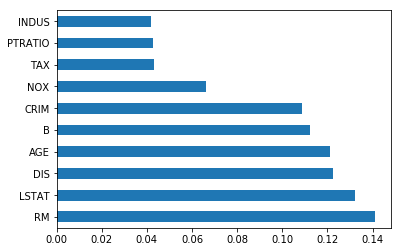

In [24]:
feat_impt=pd.Series(model.feature_importances_, index= x.columns)
feat_impt.nlargest(10).plot(kind='barh')
plt.show()

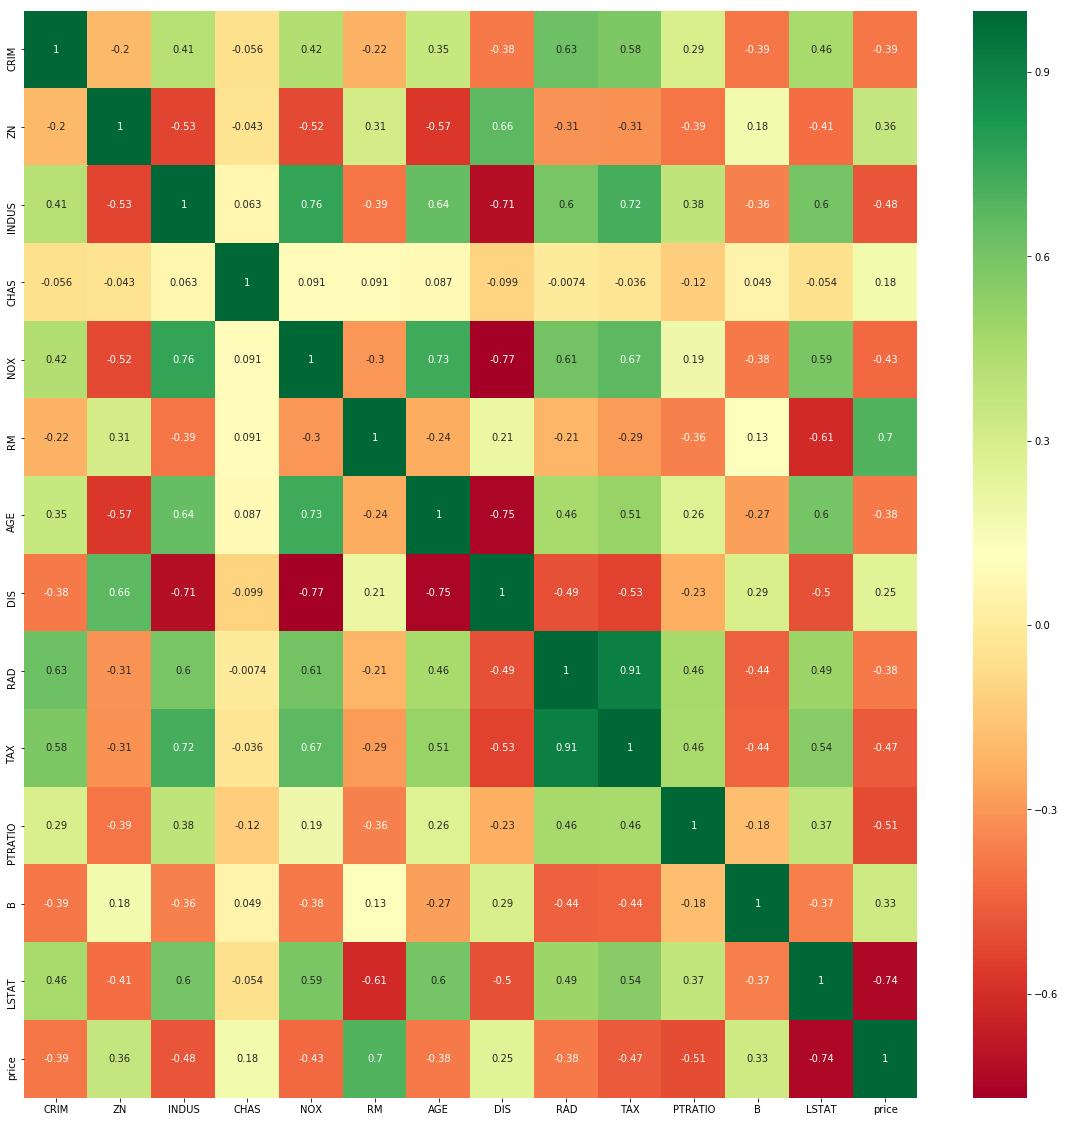

In [25]:
corrmat= df.corr()
tf=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[tf].corr(),annot=True, cmap='RdYlGn')


In [0]:

bf = SelectKBest(score_func=chi2, k=10)
fit = bf.fit(x,y)

In [0]:
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [0]:
fs=pd.concat([dfcolumns, dfscore], axis=1)
fs.columns=['specs', 'columns']

In [29]:
fs


,specs,columns
0,CRIM,5360.115912
1,ZN,6622.534639
2,INDUS,935.729151
3,CHAS,53.053015
4,NOX,5.259642
5,RM,21.614532
6,AGE,2482.496121
7,DIS,174.705605
8,RAD,1495.398091
9,TAX,15383.874566


In [0]:
dup = df.copy()

In [31]:
dup.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
newdf=dup.drop(['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B', 'INDUS'], axis=1)

In [35]:
newdf.head()

,RM,TAX,PTRATIO,LSTAT,price
0,6.575,296.0,15.3,4.98,24.0
1,6.421,242.0,17.8,9.14,21.6
2,7.185,242.0,17.8,4.03,34.7
3,6.998,222.0,18.7,2.94,33.4
4,7.147,222.0,18.7,5.33,36.2


In [0]:
newx=newdf.iloc[:,0:-1]
newy=newdf.iloc[:,-1]

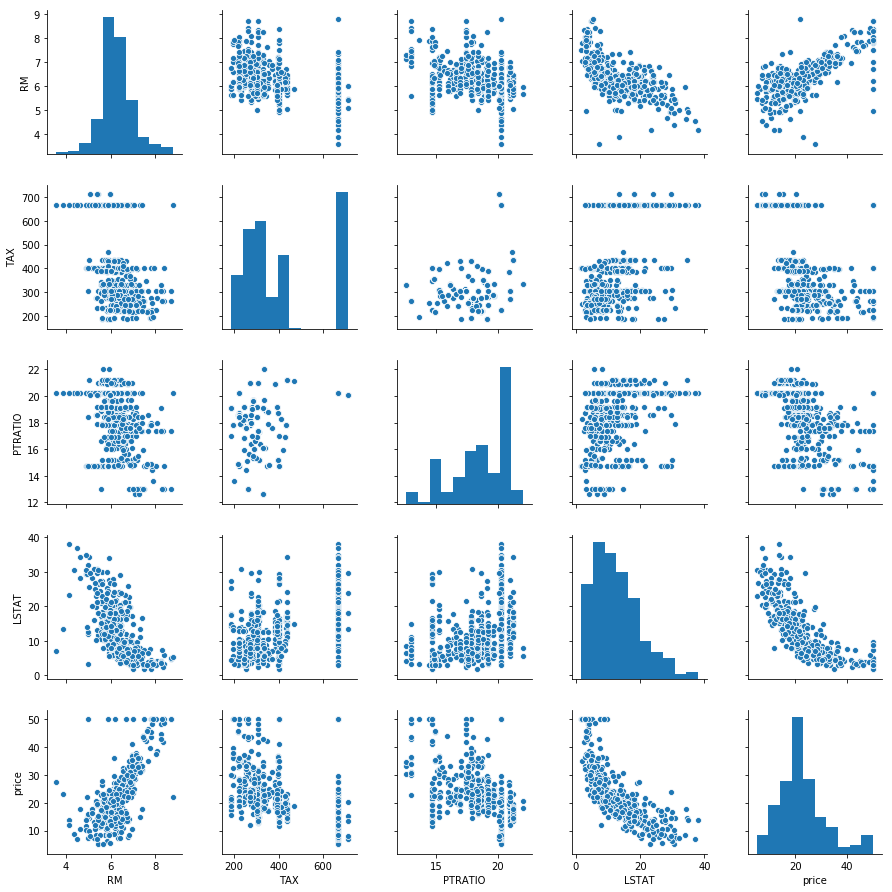

In [40]:
sns.pairplot(newdf)
plt.tight_layout()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(newx, newy, test_size=0.3, random_state=0)

In [42]:
X_train.shape, X_test.shape

((354, 4), (152, 4))

In [44]:
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
predict=model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score

In [47]:
score =r2_score(y_test, predict)
mae= mean_absolute_error(y_test, predict)
mse=mean_squared_error(y_test, predict)


print("r2:", score)
print("MAE:", mae)
print("MSE:", mse)

r2: 0.5917100529188823
MAE: 3.975866036257895
MSE: 33.99646726021232
